# Customer Segmentation

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [12]:
# load dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/Morris-mk/IFood_Marketing-data-Analysis-segmentation-and-classification/refs/heads/main/data/Cleaned_dataframe.csv')
df.head()

,ID,Customer_age,Age_group,Income,Income_group,Customer_days,Education,Marital_Status,Kidhome,Teenhome,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,5524,63,Senior,58138.0,middle_income,4721,Graduation,Single,0,0,...,10,4,7,0,0,0,0,0,0,1
1,2174,66,Senior,46344.0,middle_income,4171,Graduation,Single,1,1,...,1,2,5,0,0,0,0,0,0,0
2,4141,55,Pre-Senior,71613.0,middle_income,4370,Graduation,Together,0,0,...,2,10,4,0,0,0,0,0,0,0
3,6182,36,Adult,26646.0,low_income,4197,Graduation,Together,1,0,...,0,4,6,0,0,0,0,0,0,0
4,5324,39,Adult,58293.0,middle_income,4219,PhD,Married,1,0,...,3,6,5,0,0,0,0,0,0,0


In [13]:
df.drop(columns=['ID', 'Age_group', 'Income_group'], inplace=True)
df.head()

,Customer_age,Income,Customer_days,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,63,58138.0,4721,Graduation,Single,0,0,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,66,46344.0,4171,Graduation,Single,1,1,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,55,71613.0,4370,Graduation,Together,0,0,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,36,26646.0,4197,Graduation,Together,1,0,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,39,58293.0,4219,PhD,Married,1,0,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [14]:
# encode categorical variables
df = pd.get_dummies(data=df, columns=['Marital_Status'], dtype='int', drop_first=True)
df.head()

,Customer_age,Income,Customer_days,Education,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,63,58138.0,4721,Graduation,0,0,58,635,88,546,...,0,0,0,0,0,1,0,1,0,0
1,66,46344.0,4171,Graduation,1,1,38,11,1,6,...,0,0,0,0,0,0,0,1,0,0
2,55,71613.0,4370,Graduation,0,0,26,426,49,127,...,0,0,0,0,0,0,0,0,1,0
3,36,26646.0,4197,Graduation,1,0,26,11,4,20,...,0,0,0,0,0,0,0,0,1,0
4,39,58293.0,4219,PhD,1,0,94,173,43,118,...,0,0,0,0,0,0,1,0,0,0


In [15]:
# encode the categorical ordinal column Education
from sklearn.preprocessing import OrdinalEncoder

#define categories and initialize class
categories = ['PhD', 'Master','Graduation','Basic', '2n Cycle']
oe_encoder = OrdinalEncoder(categories=[categories])

# encode
df['Education_encoded'] = oe_encoder.fit_transform(df[['Education']])

# drop the original education column
df = df.drop(columns='Education')

In [16]:
df.head()

,Customer_age,Income,Customer_days,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_encoded
0,63,58138.0,4721,0,0,58,635,88,546,172,...,0,0,0,0,1,0,1,0,0,2.0
1,66,46344.0,4171,1,1,38,11,1,6,2,...,0,0,0,0,0,0,1,0,0,2.0
2,55,71613.0,4370,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,1,0,2.0
3,36,26646.0,4197,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,1,0,2.0
4,39,58293.0,4219,1,0,94,173,43,118,46,...,0,0,0,0,0,1,0,0,0,0.0


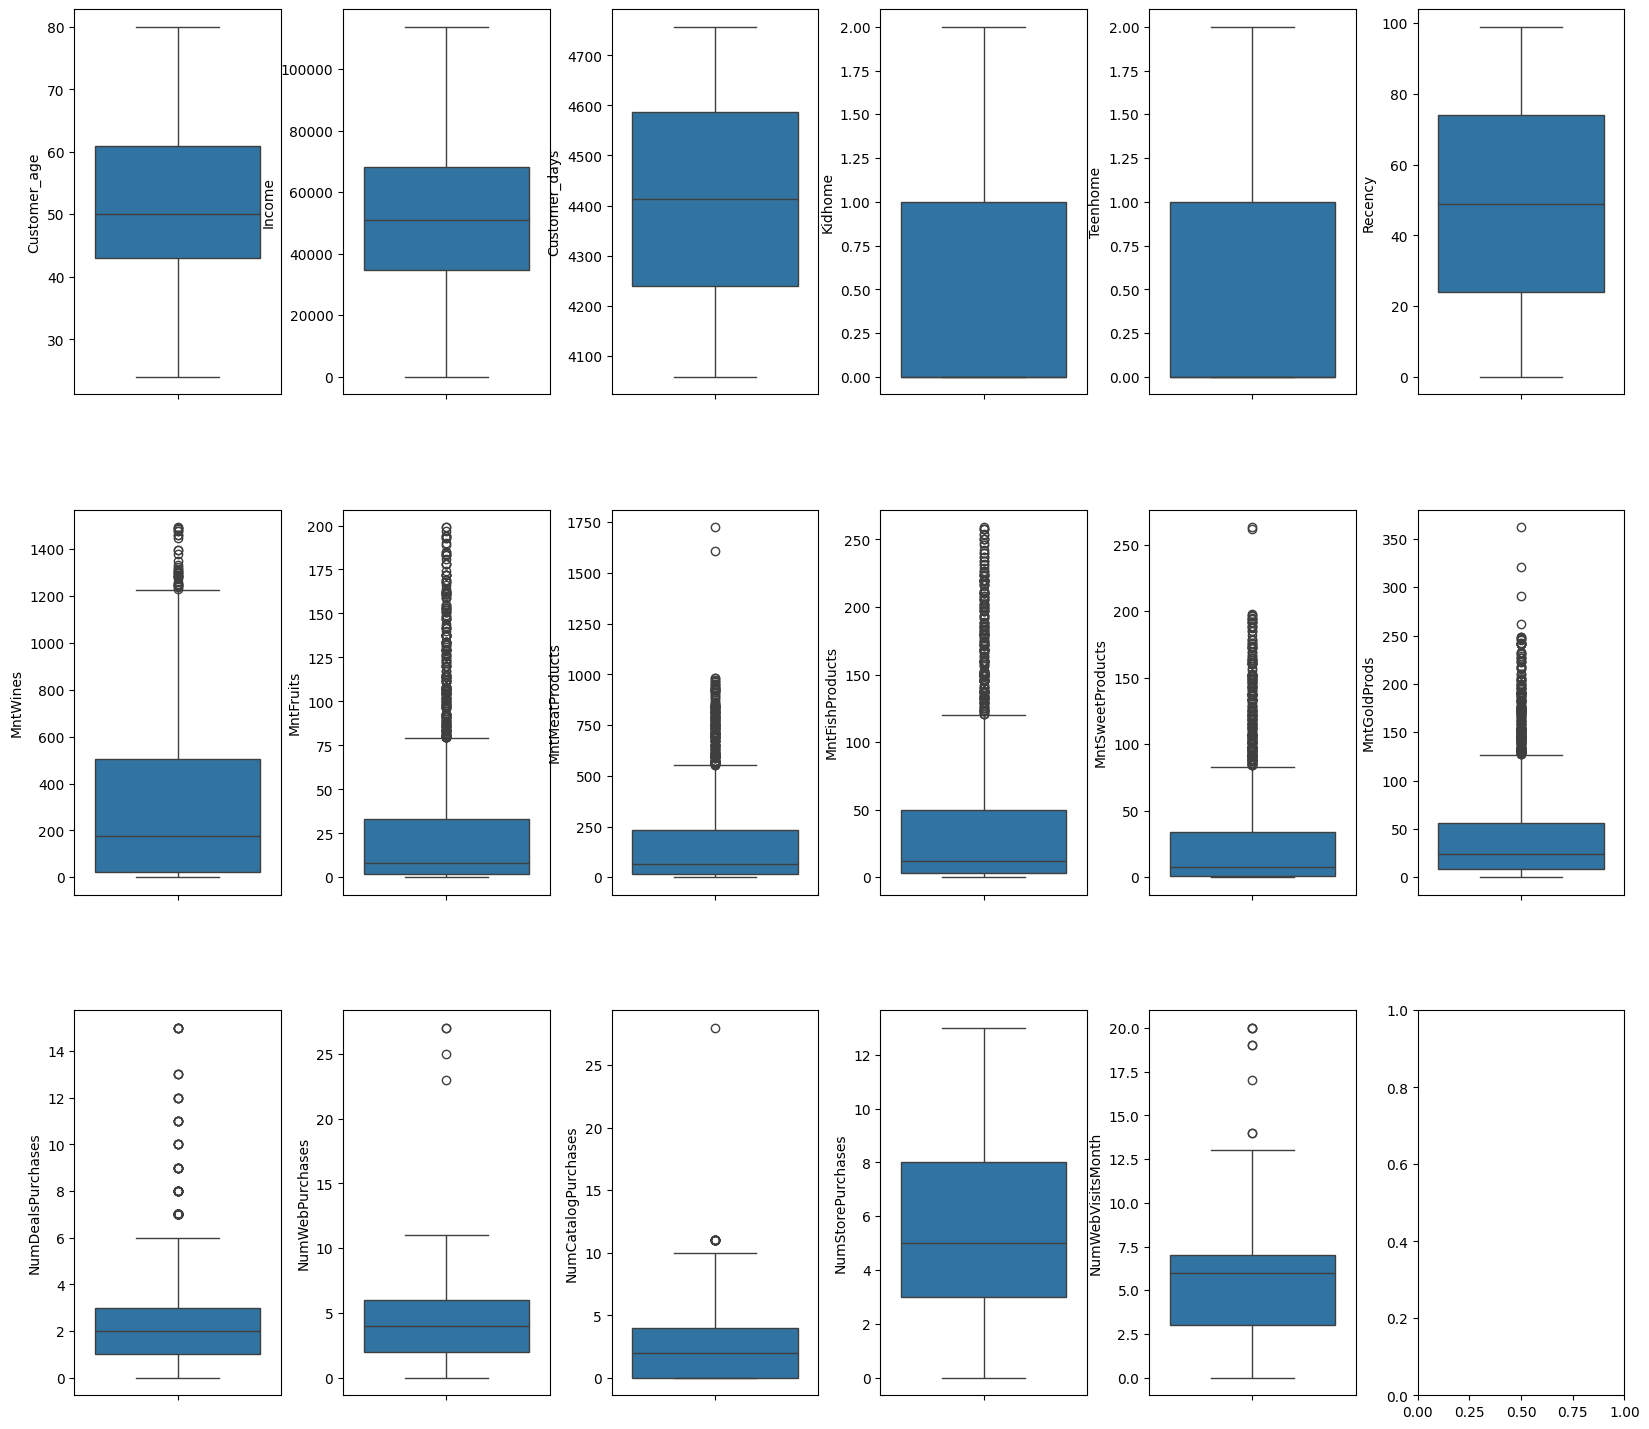

In [35]:
# create boxplots for columns with continous data
cols = df.columns[:17]

def create_boxplot(data, cols):
    fig, axs = plt.subplots(3,6, figsize=(20, 18))
    axs = axs.flatten()
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for index, col in enumerate(cols):
        if index < len(cols):
            sns.boxplot(data[col], ax=axs[index])
            #axs[index].set_title(f'boxplot for {col}')

        else:
            break

create_boxplot(df, cols)

There is some presence of noise in the data due to outliers in some of the columns

## Customer segmentation using Kmeans Clustering 

In [19]:
# scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Customer_age,Income,Customer_days,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_encoded
0,1.015715,0.332405,1.529265,-0.825592,-0.931676,0.307314,0.980166,1.550778,1.736151,2.456789,...,-0.280885,-0.284586,-0.279954,-0.095152,2.381943,-0.793338,1.893785,-0.589612,-0.189158,0.349778
1,1.272020,-0.221969,-1.190769,1.031365,0.904492,-0.383771,-0.873191,-0.637618,-0.726371,-0.651738,...,-0.280885,-0.284586,-0.279954,-0.095152,-0.419825,-0.793338,1.893785,-0.589612,-0.189158,0.349778
2,0.332234,0.965793,-0.206611,-0.825592,-0.931676,-0.798422,0.359410,0.569773,-0.174584,1.341376,...,-0.280885,-0.284586,-0.279954,-0.095152,-0.419825,-0.793338,-0.528043,1.696031,-0.189158,0.349778
3,-1.291031,-1.147868,-1.062186,1.031365,-0.931676,-0.798422,-0.873191,-0.562156,-0.662528,-0.505455,...,-0.280885,-0.284586,-0.279954,-0.095152,-0.419825,-0.793338,-0.528043,1.696031,-0.189158,0.349778
4,-1.034726,0.339690,-0.953384,1.031365,-0.931676,1.551268,-0.392031,0.418849,-0.215626,0.152822,...,-0.280885,-0.284586,-0.279954,-0.095152,-0.419825,1.260496,-0.528043,-0.589612,-0.189158,-1.432289


### Find the optimum number of clusters

In [44]:
X = df.iloc[:, 1:6]
y= df.Response

In [45]:
X

,Income,Customer_days,Kidhome,Teenhome,Recency
0,58138.0,4721,0,0,58
1,46344.0,4171,1,1,38
2,71613.0,4370,0,0,26
3,26646.0,4197,1,0,26
4,58293.0,4219,1,0,94
...,...,...,...,...,...
2224,61223.0,4439,0,1,46
2225,64014.0,4077,2,1,56
2226,56981.0,4213,0,0,91
2227,69245.0,4214,0,1,8


In [46]:
# finding the optimal k clusters
inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)    

Text(0.5, 0, 'values for k')

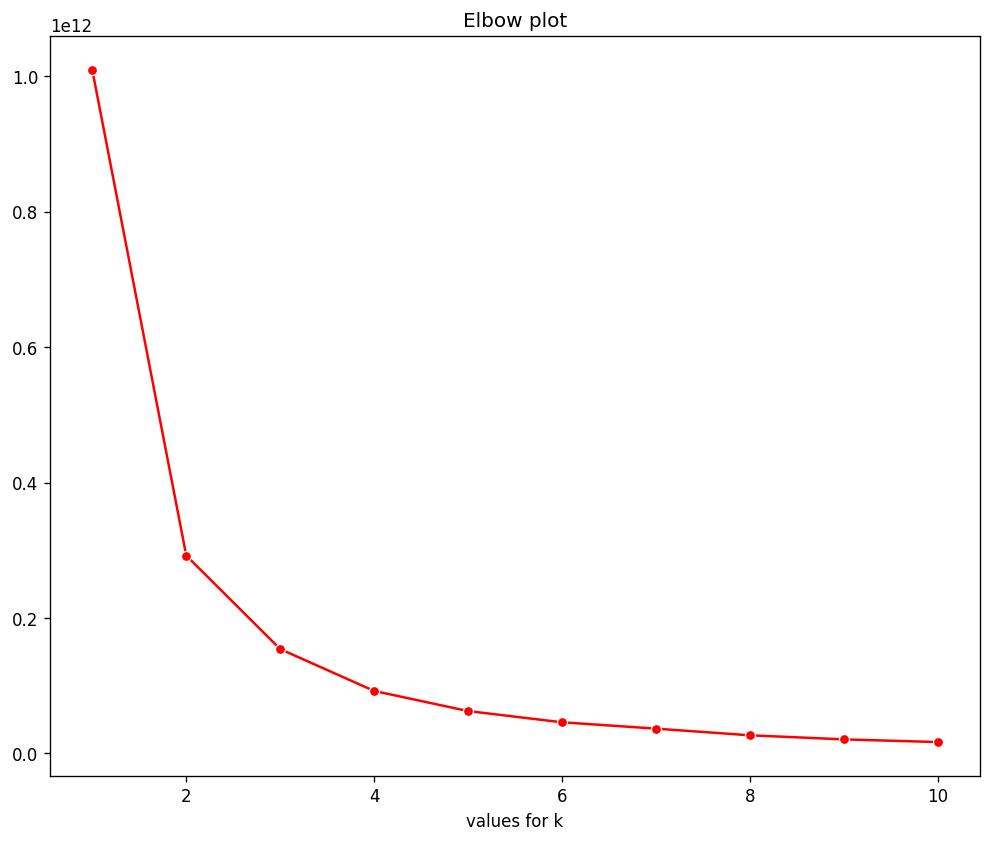

In [47]:
plt.figure(figsize=(10, 8), dpi=120)
sns.lineplot(x=range(1, 11), y=inertias, marker='o', color='red')
plt.title('Elbow plot')
plt.xlabel(f'values for k')

In [ ]:
# visualize the clusters 
